Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

Удалите строки с пропущенными значениями из датасета

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383837/games.csv')


In [123]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [124]:
df.shape

(16598, 11)

In [125]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [126]:
df_new = df.dropna()
df_new.shape


(16291, 11)

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [127]:
df_new.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

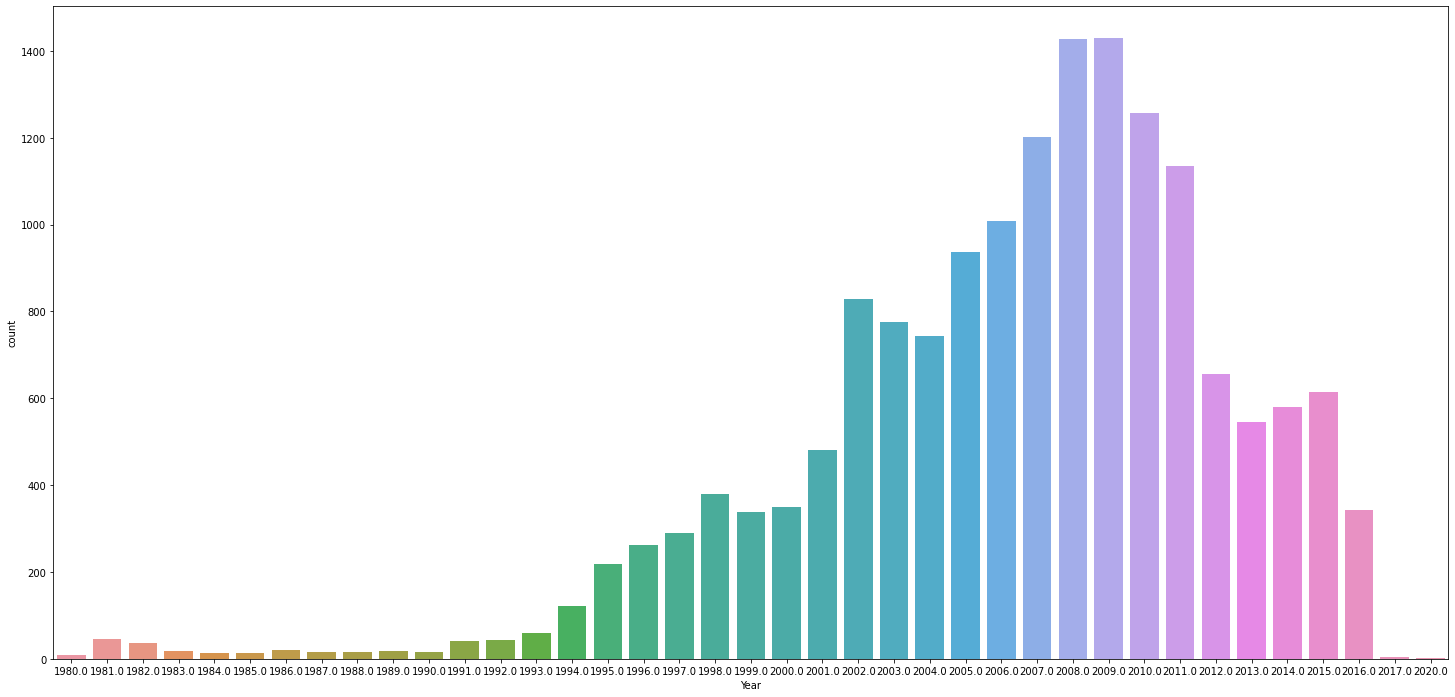

In [128]:
plt.figure(figsize = (25,12))
sns.countplot(df_new.Year)


На каких платформах произошло больше всего релизов?
Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%

In [129]:
Platforms = df_new.Platform\
    .value_counts(normalize=True)\
    .mul(100)\
    .to_frame('total_percent')
Platforms.query('total_percent > 7')

,total_percent
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508


Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [130]:
df_new.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Naxat Soft                         1
inXile Entertainment               1
Cygames                            1
Quest                              1
Intergrow                          1
Name: Publisher, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [131]:
df_new.query('Publisher == "Nintendo"')\
    [['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']]\
    .agg(['mean', 'std', 'median'])                                                    

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
median,0.375000,0.120000,0.280000,0.030000,0.920000


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)

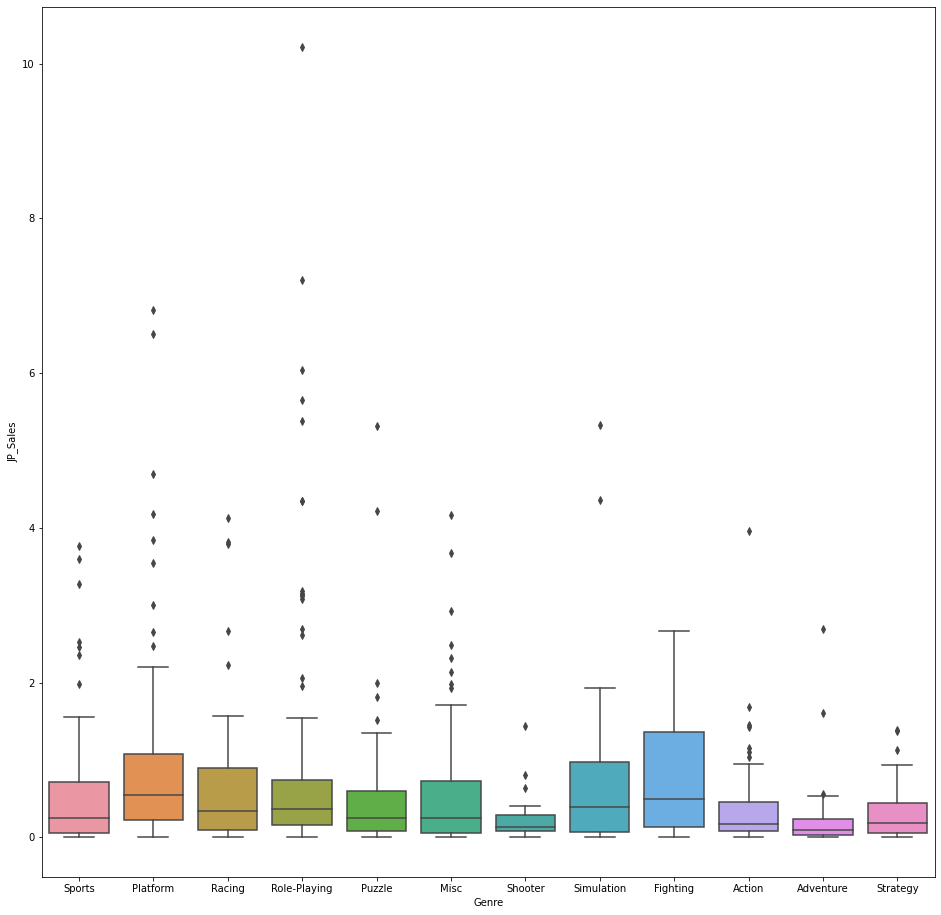

In [132]:
nintendo = df_new.query('Publisher == "Nintendo"')

plt.figure(figsize=(16,16))
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = nintendo)

Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [154]:
JP_sales = df_new.query('Publisher == "Nintendo"' and 'Genre == ["Fighting", "Simulation", "Platform", "Racing", "Sports"]')\
    .groupby('Year', as_index = False)\
    .agg({'Global_Sales':'sum'})
JP_sales.sort_values(by = 'Global_Sales', ascending = False)


,Year,Global_Sales
28,2008.0,283.84
29,2009.0,279.66
26,2006.0,264.37
27,2007.0,239.54
25,2005.0,208.51
30,2010.0,196.24
23,2003.0,196.13
24,2004.0,186.51
21,2001.0,184.18
22,2002.0,177.42
